In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
from sklearn import metrics

In [2]:
# Cargamos el dataset
df = pd.read_csv('Data/properatti.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [4]:
#Elegimos algunas columnas
df = df[['property_type', 'place_name', 'place_with_parent_names', 'state_name', 'geonames_id', 'lat', 'lon', 
        'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
        'expenses', 'description', 'title']]

In [5]:
#Seleccionamos capital federal y las propiedades con precio
df_capital_precio = df[pd.notnull((df['price_usd_per_m2'])) & (df['state_name'] == 'Capital Federal')]
df_capital_precio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 16 columns):
property_type              23434 non-null object
place_name                 23434 non-null object
place_with_parent_names    23434 non-null object
state_name                 23434 non-null object
geonames_id                22390 non-null float64
lat                        17217 non-null float64
lon                        17217 non-null float64
price_aprox_usd            23434 non-null float64
surface_total_in_m2        23434 non-null float64
surface_covered_in_m2      22319 non-null float64
price_usd_per_m2           23434 non-null float64
floor                      1405 non-null float64
rooms                      10554 non-null float64
expenses                   5929 non-null float64
description                23434 non-null object
title                      23434 non-null object
dtypes: float64(10), object(6)
memory usage: 3.0+ MB


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


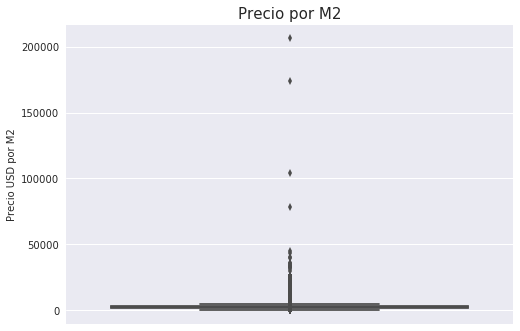

In [6]:
plt.title("Precio por M2", fontsize=15)
sns.boxplot(y="price_usd_per_m2", data=df_capital_precio)
plt.ylabel('Precio USD por M2', fontsize=10)

In [7]:
#Eliminamos los que tienen valor por m2 mayor a 5000 y los que tienen sup cubierta mayor a sup total
df_capital_precio = df[pd.notnull((df['price_usd_per_m2'])) & (df['state_name'] == 'Capital Federal') & 
                       (df['price_usd_per_m2'] < 5000)].copy()

df_capital_precio = df_capital_precio[df_capital_precio['surface_total_in_m2'] >= df_capital_precio['surface_covered_in_m2']]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


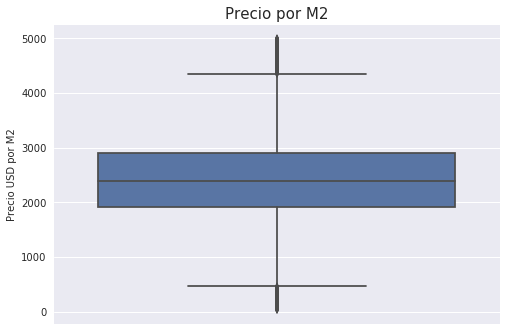

In [8]:
plt.title("Precio por M2", fontsize=15)
sns.boxplot(y="price_usd_per_m2", data=df_capital_precio)
plt.ylabel('Precio USD por M2', fontsize=10)

In [9]:
#Eliminamos los que tienen valor por m2 menor a 400
df_capital_precio = df_capital_precio[df_capital_precio['price_usd_per_m2'] > 400]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


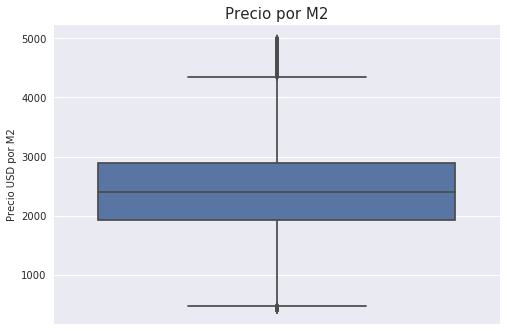

In [10]:
plt.title("Precio por M2", fontsize=15)
sns.boxplot(y="price_usd_per_m2", data=df_capital_precio)
plt.ylabel('Precio USD por M2', fontsize=10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


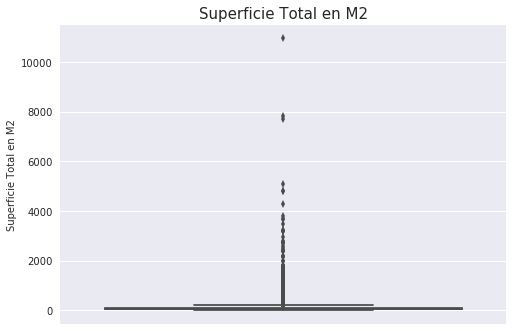

In [11]:
plt.title("Superficie Total en M2", fontsize=15)
sns.boxplot(y="surface_total_in_m2", data=df_capital_precio)
plt.ylabel('Superficie Total en M2', fontsize=10)

In [12]:
#Eliminamos los que tienen superficie mayor a 1000 m2
df_capital_precio = df_capital_precio[(df_capital_precio['surface_total_in_m2'] < 1000)].copy()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


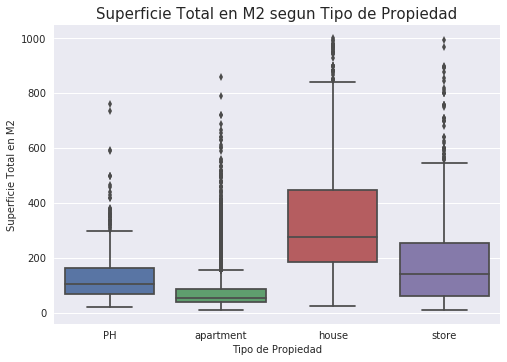

In [13]:
plt.title("Superficie Total en M2 segun Tipo de Propiedad", fontsize=15)
sns.boxplot(y="surface_total_in_m2",x="property_type", data=df_capital_precio)
plt.ylabel('Superficie Total en M2', fontsize=10)
plt.xlabel('Tipo de Propiedad', fontsize=10)

In [14]:
def get_outliers_by_property(property_type):
    if property_type == "PH":
        return 400
    elif property_type == "apartment":
        return 200
    elif property_type == "house":
        return 900
    elif property_type == "store":
        return 600
    return 1000

def compute_outlier_surface(property_type, surface):
    hight_surface = get_outliers_by_property(property_type)
    if surface <  hight_surface:
        return surface
    else:
        return hight_surface
        

In [15]:
#Eliminamos outliers de sup en m2 segun el tipo de propiedad
df_capital_precio['surface_total_in_m2'] = df_capital_precio.apply(lambda row: compute_outlier_surface(row['property_type'],row['surface_total_in_m2']),axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


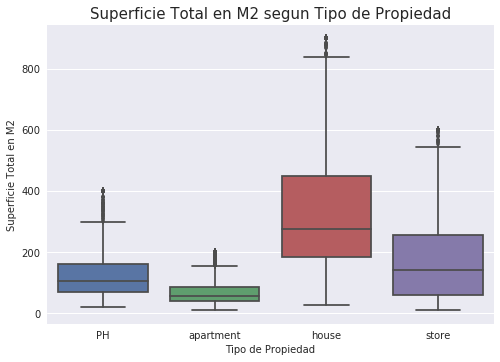

In [16]:
plt.title("Superficie Total en M2 segun Tipo de Propiedad", fontsize=15)
sns.boxplot(y="surface_total_in_m2",x="property_type", data=df_capital_precio)
plt.ylabel('Superficie Total en M2', fontsize=10)
plt.xlabel('Tipo de Propiedad', fontsize=10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


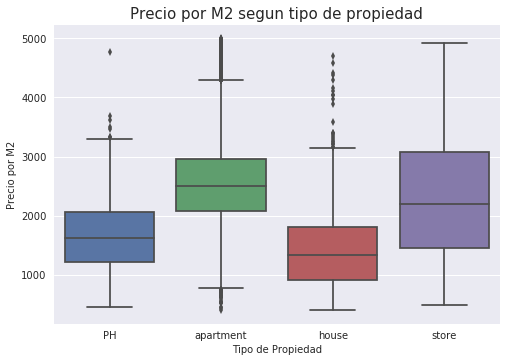

In [17]:
plt.title("Precio por M2 segun tipo de propiedad", fontsize=15)
sns.boxplot(y="price_usd_per_m2", x="property_type", data=df_capital_precio)
plt.ylabel('Precio por M2', fontsize=10)
plt.xlabel('Tipo de Propiedad', fontsize=10)

In [18]:
#Completamos los valores faltantes de lat y lon con la media de cada barrio
lat_by_place_name = df_capital_precio.groupby('place_name')['lat'].mean()
lon_by_place_name = df_capital_precio.groupby('place_name')['lon'].mean()

df_capital_precio['lat'] = df_capital_precio.apply(lambda row: lat_by_place_name[row['place_name']], axis=1)
df_capital_precio['lon'] = df_capital_precio.apply(lambda row: lon_by_place_name[row['place_name']], axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


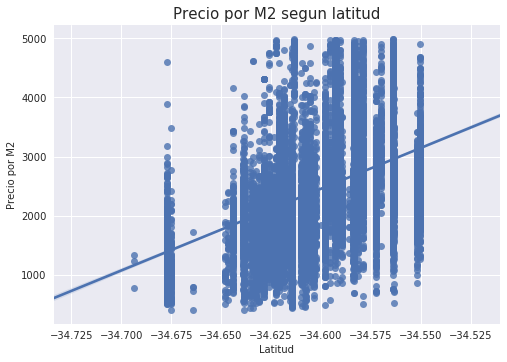

In [19]:
plt.title("Precio por M2 segun latitud", fontsize=15)
sns.regplot(y="price_usd_per_m2", x="lat", data=df_capital_precio)
plt.ylabel('Precio por M2', fontsize=10)
plt.xlabel('Latitud', fontsize=10)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


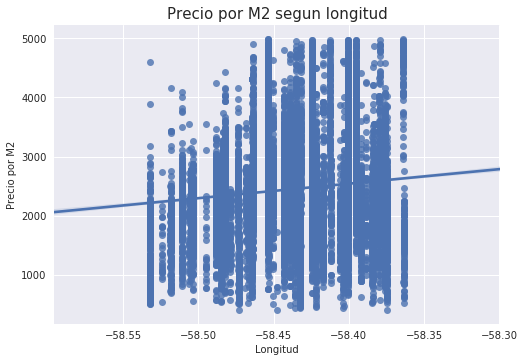

In [20]:
plt.title("Precio por M2 segun longitud", fontsize=15)
sns.regplot(y="price_usd_per_m2", x="lon", data=df_capital_precio)
plt.ylabel('Precio por M2', fontsize=10)
plt.xlabel('Longitud', fontsize=10)

In [21]:
#Matriz de correlacion entre precio, expensas, latitud y longitud
df_capital_precio[['lat','lon','price_usd_per_m2','expenses']].corr()

,lat,lon,price_usd_per_m2,expenses
lat,1.000000,-0.111712,0.439645,-0.029419
lon,-0.111712,1.000000,0.113050,-0.038652
price_usd_per_m2,0.439645,0.113050,1.000000,0.021872
expenses,-0.029419,-0.038652,0.021872,1.000000


In [22]:
df_capital_precio.sample(10)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,description,title
74722,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.677247,-58.532309,415000.0,280.0,270.0,1482.142857,NaN,NaN,NaN,VENTA CASA 5 AMB LOTE PROPIO: BARRIO NAON.P.B...,Casa en Mataderos
63371,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Capital Federal,3435874.0,-34.618468,-58.443137,175000.0,65.0,60.0,2692.307692,NaN,3.0,2500.0,Departamento 3 ambientes al frente con balcón ...,Departamento venta
80316,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,3433775.0,-34.572552,-58.482239,230000.0,91.0,83.0,2527.472527,NaN,NaN,5100.0,Hermoso semipiso de 91m2 totales (83 cubiertos...,Cómodo semipiso de tres ambientes de 91m2 con...
48165,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Capital Federal,3435356.0,-34.578652,-58.450240,240000.0,109.0,81.0,2201.834862,NaN,4.0,NaN,"Excelente Triplex, en edificio ""Premio Municip...","Increible Triplex C/ Playroom, Terraza y Pilet..."
110429,apartment,Villa General Mitre,|Argentina|Capital Federal|Villa General Mitre|,Capital Federal,3427433.0,-34.609964,-58.467125,54300.0,24.0,24.0,2262.500000,4.0,1.0,NaN,"Departamento MONOAMBIENTE, muy luminoso. Livin...",MUY LUMINOSO // TRES ARROYOS 2400
108140,apartment,Villa Ortuzar,|Argentina|Capital Federal|Villa Ortuzar|,Capital Federal,3427387.0,-34.581232,-58.468521,75000.0,33.0,31.0,2272.727273,NaN,NaN,NaN,CODIGO: 916-69624 ubicado en: ROSETI 1900 - P...,"Departamento en Venta en Villa Ortúzar, Capita..."
48934,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Capital Federal,3435874.0,-34.618468,-58.443137,84000.0,31.0,31.0,2709.677419,NaN,1.0,NaN,Monoambiente al frente con balcón. Luminoso. B...,Monoambiente en venta al frente. Muy Luminoso
64929,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Capital Federal,3427458.0,-34.597778,-58.438991,153000.0,59.0,50.0,2593.220339,NaN,NaN,2000.0,"3 ambientes, contrafrente con vista abierta, m...",3 ambientes en alquiler con cochera
36412,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,-34.564093,-58.453591,119000.0,36.0,35.0,3305.555556,NaN,2.0,NaN,Departamento 2 ambientes piso alto super lumin...,DEPARTAMENTO EN VENTA 2 AMBIENTES EN BELGRANO ...
23267,apartment,Saavedra,|Argentina|Capital Federal|Saavedra|,Capital Federal,3429422.0,-34.551781,-58.483429,165000.0,79.0,56.0,2088.607595,3.0,NaN,NaN,IMPECABLE DEPARTAMENTO DE 2 AMBIENTES AL FRENT...,"Departamento 79m² con Plantas en Besares 3700,..."


In [23]:
#Creamos variables categoricas para las expensas por m2 (baja, media, alta y no definido)
expenses_for_surface = df_capital_precio[['expenses','surface_total_in_m2']].apply(lambda row: row['expenses']/row['surface_total_in_m2'],axis=1)

In [24]:
print("Baja: {}".format(np.percentile(expenses_for_surface.dropna(), 30)))

print("Alta: {}".format(np.percentile(expenses_for_surface.dropna(), 70)))

Baja: 25.0
Alta: 45.45454545454545


In [25]:
def get_expenses(x):
    if np.isnan(x['expenses']):
        return 'no definido'
    x = x['expenses']/x['surface_total_in_m2']
    if 0 < x <= 25:
        return 'baja'
    elif 25 < x <= 45:
        return 'media'
    elif 45 < x <= 100:
        return 'alta'
    return 'no definido'

In [26]:
#Agregamos la columna del tipo de expensas al dataset
df_capital_precio['expenses_range'] = df_capital_precio[['expenses','surface_total_in_m2']].apply(get_expenses,axis=1)

In [27]:
df_capital_precio.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,description,title,expenses_range
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.677247,-58.532309,62000.0,55.0,40.0,1127.272727,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,no definido
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.677247,-58.532309,72000.0,55.0,55.0,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,no definido
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,-34.564093,-58.453591,138000.0,45.0,40.0,3066.666667,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,no definido
8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,-34.564093,-58.453591,195000.0,65.0,60.0,3000.000000,NaN,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",no definido
13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,3430234.0,-34.590498,-58.424523,111700.0,50.0,30.0,2234.000000,NaN,1.0,NaN,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,no definido


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


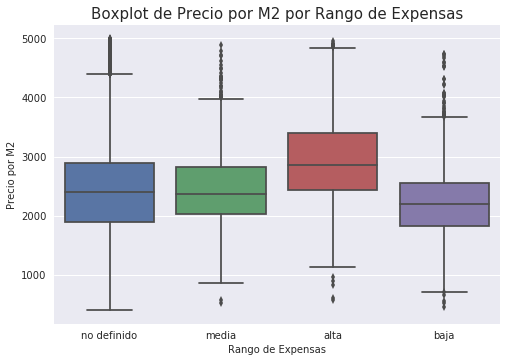

In [28]:
plt.title("Boxplot de Precio por M2 por Rango de Expensas", fontsize=15)
sns.boxplot(y="price_usd_per_m2", x="expenses_range", data=df_capital_precio)
plt.ylabel('Precio por M2', fontsize=10)
plt.xlabel('Rango de Expensas', fontsize=10)

In [29]:
#Cantidad de ambientes no declarados en la columna rooms
rooms_nulos = df_capital_precio.apply(lambda row: pd.isnull(row['rooms']) , axis = 1)

len([t for t in rooms_nulos if t==True])

11133

In [30]:
import re
def get_rooms(row):
    if pd.isnull(row['rooms']):
        num = re.findall("\d ambiente", row['description'],re.IGNORECASE)
        if len(num) > 0:
            return int(num[0].split(" ")[0])
        else:
            num = re.findall("\d dormitorio", row['description'],re.IGNORECASE)
            if len(num) > 0:
                return int(num[0].split(" ")[0])+1
            else:
                num = re.findall("\d habitaci", row['description'],re.IGNORECASE)
                if len(num) > 0:
                    return int(num[0].split(" ")[0])+1
    return row['rooms']
    

In [31]:
#Conseguimos algunos valores de cantidad de ambientes de la descripcion
ambientes = df_capital_precio.apply(get_rooms, axis=1)

len([t for t in pd.isnull(ambientes) if t==True])

5055

In [32]:
#Imputamos algunos datos faltantes de la columna rooms segun la informacion de la descripcion
df_capital_precio['rooms'] = ambientes

In [33]:
#Buscaremos completar los rooms faltantes a partir de los m2
df_capital_precio['surface_discrete']=df_capital_precio.apply(lambda row: int(row['surface_total_in_m2']/10) ,axis =1)

In [34]:
def get_rooms_by_mean(row):
    if pd.isnull(row['rooms']) & (row['property_type'] != "PH"):
        surface_total = int(row['surface_total_in_m2'])
        if surface_total <= 35:
            return 1
        elif 35 < surface_total <= 55:
            return 2
        elif 55 < surface_total <= 100:
            return 3
        else:
            return 4
    return row['rooms']

In [35]:
df_capital_precio[['surface_total_in_m2','surface_discrete','rooms']].head()

,surface_total_in_m2,surface_discrete,rooms
0,55.0,5,2.0
2,55.0,5,2.0
7,45.0,4,NaN
8,65.0,6,NaN
13,50.0,5,1.0


In [36]:
ambientes = df_capital_precio.apply(get_rooms_by_mean ,axis =1)

len([t for t in pd.isnull(ambientes) if t==True])

179

In [37]:
#Completamos los rooms faltantes a partir de la cantidad de m2 que tiene la propiedad
df_capital_precio['rooms'] = ambientes

df_capital_precio[['surface_total_in_m2','surface_discrete','rooms']].head()

,surface_total_in_m2,surface_discrete,rooms
0,55.0,5,2.0
2,55.0,5,2.0
7,45.0,4,2.0
8,65.0,6,3.0
13,50.0,5,1.0


In [38]:
df_capital_precio.groupby('surface_discrete')['rooms'].mean().head()

surface_discrete
1    1.021739
2    1.150082
3    1.476946
4    1.894301
5    2.279529
Name: rooms, dtype: float64

In [39]:
#Nos quedamos con el data set que tiene datos en la columna rooms
data_set_final = df_capital_precio[pd.notnull(df_capital_precio['rooms'])].copy()

In [40]:
data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20143 entries, 0 to 121219
Data columns (total 18 columns):
property_type              20143 non-null object
place_name                 20143 non-null object
place_with_parent_names    20143 non-null object
state_name                 20143 non-null object
geonames_id                19242 non-null float64
lat                        20143 non-null float64
lon                        20143 non-null float64
price_aprox_usd            20143 non-null float64
surface_total_in_m2        20143 non-null float64
surface_covered_in_m2      20143 non-null float64
price_usd_per_m2           20143 non-null float64
floor                      1310 non-null float64
rooms                      20143 non-null float64
expenses                   5320 non-null float64
description                20143 non-null object
title                      20143 non-null object
expenses_range             20143 non-null object
surface_discrete           20143 non-null int64
d

In [41]:
#Eliminamos las columnas que no vamos a utilizar

del data_set_final['geonames_id']
del data_set_final['floor']
del data_set_final['expenses']

In [42]:
data_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20143 entries, 0 to 121219
Data columns (total 15 columns):
property_type              20143 non-null object
place_name                 20143 non-null object
place_with_parent_names    20143 non-null object
state_name                 20143 non-null object
lat                        20143 non-null float64
lon                        20143 non-null float64
price_aprox_usd            20143 non-null float64
surface_total_in_m2        20143 non-null float64
surface_covered_in_m2      20143 non-null float64
price_usd_per_m2           20143 non-null float64
rooms                      20143 non-null float64
description                20143 non-null object
title                      20143 non-null object
expenses_range             20143 non-null object
surface_discrete           20143 non-null int64
dtypes: float64(7), int64(1), object(7)
memory usage: 2.5+ MB


In [43]:
data_set_final.sample(5)

,property_type,place_name,place_with_parent_names,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,title,expenses_range,surface_discrete
48576,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,-34.583379,-58.424336,535000.00,176.0,165.0,3039.772727,5.0,Duplex sobre Bustamante esquina Peña. Edificio...,Duplex en Palermo sobre la calle Bustamante es...,no definido,17
51630,store,Monserrat,|Argentina|Capital Federal|Monserrat|,Capital Federal,-34.615677,-58.384074,190000.00,237.0,237.0,801.687764,4.0,"Local a reciclar, ideal empresa de servicios,...",LOCAL A RECICLAR INMEJORABLE RELACIÓN U$/M2 ...,no definido,23
7987,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Capital Federal,-34.618468,-58.443137,88900.00,36.0,36.0,2469.444444,1.0,"Emprendimiento ícono en la zona, Caballito Nor...",Departamento - Caballito Norte,no definido,3
116831,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,-34.572552,-58.482239,319812.00,123.0,92.0,2600.097561,4.0,Detalles de diseño en una torre de triple fren...,Departamento - Urquiza R,no definido,12
44524,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,-34.572552,-58.482239,226414.85,81.0,68.0,2795.245062,3.0,EL EDIFICIO -SUM-SOLARIUM-PISCINA-COCHERAS OPC...,NUEVO EMPRENDIMIENTO EN EL BARRIO DE VILLA URQ...,no definido,8


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


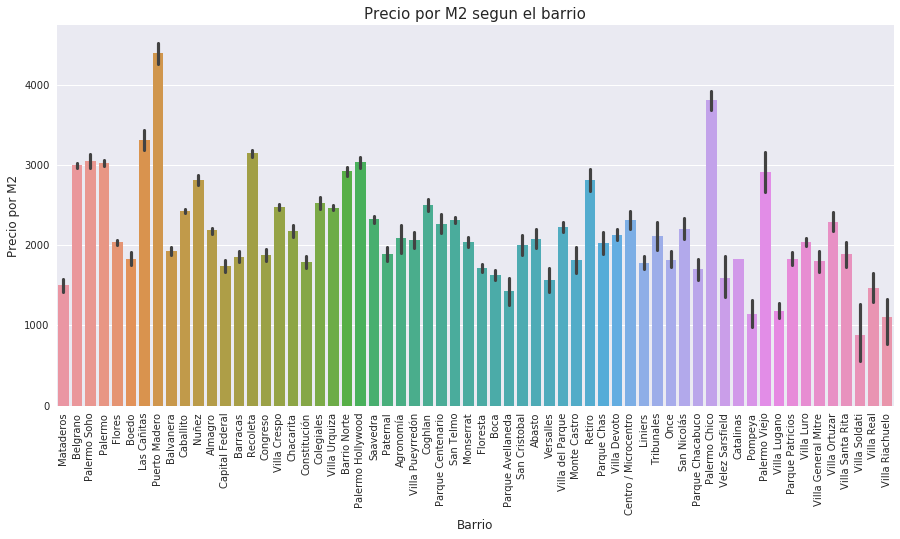

In [44]:
plt.figure(figsize = (15, 7))
plt.title("Precio por M2 segun el barrio", fontsize=15)
plt.xticks(rotation = 90)
sns.barplot(y="price_usd_per_m2", x="place_name", data=df_capital_precio)
plt.ylabel('Precio por M2', fontsize=12)
plt.xlabel('Barrio', fontsize=12)

In [45]:
df_temp = data_set_final[['lat','lon','property_type','place_name','surface_total_in_m2','surface_covered_in_m2'
                     ,'rooms','expenses_range','price_usd_per_m2']]

In [46]:
#Dataset para hacer la regresión
df_reg = df_temp[df_temp['surface_covered_in_m2'].notnull()]

In [47]:
#Armamos variables dummies de las categoricas y eliminamos la primera para que no haya combinacion lineal con las demas
df_dummies = pd.get_dummies(df_reg, drop_first= True)
df_dummies.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,rooms,price_usd_per_m2,property_type_apartment,property_type_house,property_type_store,place_name_Agronomía,...,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,expenses_range_baja,expenses_range_media,expenses_range_no definido
0,-34.677247,-58.532309,55.0,40.0,2.0,1127.272727,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-34.677247,-58.532309,55.0,55.0,2.0,1309.090909,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,-34.564093,-58.453591,45.0,40.0,2.0,3066.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,-34.564093,-58.453591,65.0,60.0,3.0,3000.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,-34.590498,-58.424523,50.0,30.0,1.0,2234.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_dummies.to_csv('limpio')

In [49]:
#Separamos las variables numericas de las categoricas para usar PolynomialFeatures
df_dummies_num = df_dummies[['lat','lon','surface_total_in_m2','surface_covered_in_m2','rooms']]

df_dummies_categ = df_dummies.drop(['lat','lon','surface_total_in_m2',
                                    'surface_covered_in_m2','rooms','price_usd_per_m2'],axis = 1).copy()

In [50]:
#Usamos polynomialfeatures y convertimos todo en arrays
matrix_reg_num = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(df_dummies_num)
matrix_reg_categ = df_dummies_categ.values
matrix_df = np.concatenate((matrix_reg_num, matrix_reg_categ),axis=1)

In [51]:
y = df_dummies[['price_usd_per_m2']].values
X = matrix_df
display(X,y)

array([[  1.        , -34.67724662, -58.53230853, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.67724662, -58.53230853, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.56409322, -58.4535906 , ...,   0.        ,
          0.        ,   1.        ],
       ..., 
       [  1.        , -34.59216808, -58.39516883, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.57255194, -58.48223871, ...,   0.        ,
          0.        ,   1.        ],
       [  1.        , -34.61422456, -58.43271629, ...,   0.        ,
          0.        ,   0.        ]])

array([[ 1127.27272727],
       [ 1309.09090909],
       [ 3066.66666667],
       ..., 
       [ 3750.        ],
       [ 2858.69565217],
       [ 1675.32467532]])

In [52]:
#Modelo regresion lineal

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

model = LinearRegression()
model.fit(Xtrain,ytrain)

y_predict = model.predict(Xtest)

print('X test size: ', Xtest.shape)
print('Y test size: ', ytest.shape)
print('X train size: ', Xtrain.shape)
print('Y train size: ', ytrain.shape)

X test size:  (5036, 88)
Y test size:  (5036, 1)
X train size:  (15107, 88)
Y train size:  (15107, 1)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


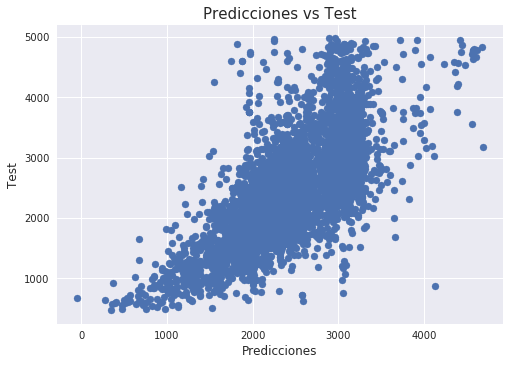

In [53]:
#scatter de las predicciones vs los valores correctos
plt.title("Predicciones vs Test", fontsize=15)
plt.scatter(y_predict,ytest)
plt.ylabel('Test', fontsize=12)
plt.xlabel('Predicciones', fontsize=12)

In [54]:
#Scores de la regresion lineal
print ('MAE:', metrics.mean_absolute_error(ytest, y_predict))
print ('MSE:', metrics.mean_squared_error(ytest, y_predict))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_predict)))
print ('R2:', metrics.r2_score(ytest, y_predict))

MAE: 428.172570588
MSE: 335370.833323
RMSE: 579.112107733
R2: 0.500663016466


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14100, 88) (14100, 1)
(6043, 88) (6043, 1)


In [56]:
# Regresion lineal, ridge y lasso

al_ridge = np.linspace(0.001, 0.5, 300)
al_lasso = np.linspace(0.0001, 0.3, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lmRidgeCV = RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
lmLassoCV = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [57]:
# Hacemos los fits respectivos

print(lm.fit(X_train, y_train))
print(lmRidgeCV.fit(X_train, y_train))
print(lmLassoCV.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RidgeCV(alphas=array([ 0.001  ,  0.00267, ...,  0.49833,  0.5    ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-04,   1.10301e-03, ...,   2.98997e-01,   3.00000e-01]),
    copy_X=True, cv=KFold(n_splits=5, random_state=12, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [61]:
print('Alpha Ridge:',lmRidgeCV.alpha_,'\n'
      'Alpha LASSO:',lmLassoCV.alpha_,'\n')

Alpha Ridge: 0.184578595318 
Alpha LASSO: 0.00110301003344 



In [62]:
# Coeficientes de Reg Lineal

(lm.intercept_,lm.coef_)

(array([ -1.02451196e+08]),
 array([[  9.94835504e+02,   1.45649621e+06,  -2.20690404e+06,
          -8.20217507e+02,   1.01478597e+03,  -1.65915571e+03,
          -1.66098650e+07,   1.97742771e+07,  -1.94717993e+01,
           3.03710345e+01,   3.31030576e+02,  -5.87823650e+06,
          -2.33553579e+00,  -7.63821024e-01,  -2.25228279e+02,
           5.69089679e-03,  -1.75764551e-04,   4.64785848e-01,
          -4.65629715e-03,  -6.25558313e-01,  -4.31938640e+00,
           4.23655016e+02,   1.37719719e+02,   5.14384050e+02,
           1.15289457e+05,  -1.35373674e+04,  -2.36152410e+04,
          -9.59654602e+04,   4.15541134e+04,   2.41717855e+05,
          -7.41448467e+04,  -8.29314127e+04,  -5.13888250e+04,
          -3.70994397e+04,  -2.45441740e-01,  -7.83458596e+03,
           9.46504172e+04,   2.80750673e+05,   1.50380151e+05,
          -2.54003091e+04,  -6.57383885e+04,  -8.72169160e+04,
          -8.80337055e+04,   1.79977691e+05,  -1.29185240e+05,
          -2.69479413e+05, 

In [63]:
# Calculamos el R2

print("Score Train Lineal:", lm.score(X_train, y_train),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_train, y_train),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_train, y_train))

# Calculamos el MSE

lmpred_Tr = lm.predict(X_train)
lmRidgepred_Tr = lmRidgeCV.predict(X_train)
lmLassoepred_Tr = lmLassoCV.predict(X_train)

print("Train MSE lineal:", mean_squared_error(y_train,lmpred_Tr), "\n"
      "Train MSE Ridge:",  mean_squared_error(y_train,lmRidgepred_Tr), "\n"
      "Train MSE Lasso:",  mean_squared_error(y_train,lmLassoepred_Tr))

Score Train Lineal: 0.511976635148 
Score Train Ridge: 0.511965392786 
Score Train Lasso: 0.509950841896
Train MSE lineal: 328097.366645 
Train MSE Ridge: 328104.924868 
Train MSE Lasso: 329459.30437


In [64]:
print("RMSE lineal=",  np.sqrt(mean_squared_error(y_train,lmpred_Tr)), "\n"
      "RMSE Ridge=",   np.sqrt(mean_squared_error(y_train,lmRidgepred_Tr)), "\n"
      "RMSE Lasso=",   np.sqrt(mean_squared_error(y_train,lmLassoepred_Tr)))

RMSE lineal= 572.797840992 
RMSE Ridge= 572.80443859 
RMSE Lasso= 573.985456584


In [65]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

lmpred_Te = lm.predict(X_test)
lmRidgepred_Te = lmRidgeCV.predict(X_test)
lmLassoepred_Te = lmLassoCV.predict(X_test)

# Testeo final del modelo sobre Test Set

print("Test Score lineal=", mean_squared_error(y_test,lmpred_Te), "\n"
      "Test Score Ridge=",  mean_squared_error(y_test,lmRidgepred_Te), "\n"
      "Test Score Lasso=",  mean_squared_error(y_test,lmLassoepred_Te))

Test Score lineal= 353363.331444 
Test Score Ridge= 331972.516268 
Test Score Lasso= 332376.768706


In [67]:
# Calculamos el R2 Test

print("Score Train Lineal:", lm.score(X_test, y_test),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_test, y_test),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_test, y_test))

Score Train Lineal: 0.43481848654 
Score Train Ridge: 0.469031694928 
Score Train Lasso: 0.468385119619


In [82]:
#RMSE en Test

print("RMSE lineal=",  np.sqrt(mean_squared_error(y_test,lmpred_Te)), "\n"
      "RMSE Ridge=",   np.sqrt(mean_squared_error(y_test,lmRidgepred_Te)), "\n"
      "RMSE Lasso=",   np.sqrt(mean_squared_error(y_test,lmLassoepred_Te)))

RMSE lineal= 594.443715959 
RMSE Ridge= 576.170561785 
RMSE Lasso= 576.521264748
